In [16]:
import pandas as pd
import spacy
from glob import glob
import matplotlib.pyplot  as plt
import numpy as np
import random 
from random import randint

In [1]:
import os as os
os.chdir('D:\\ETH\\Robut')
os.getcwd()
nlp = spacy.load('en')

'D:\\ETH\\Robut'

In [39]:
import nltk
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [ ]:
## load Data
filename = glob('cases/*txt')
filename1 = filename[:1000]
sentence = []
for fname in filename1:
    Id = fname.split("_")[-1][:-4] # get docId from filename
    text = open(fname,encoding="utf8").read()
    doc = nlp(text)
    sentence.append(list(doc.sents))
    #token_norm[Id]= normalize_text(doc)

In [ ]:
def normalize_sent(sentences):
    tokens = []
    for sentence in sentences:
        sent= str(sentence)
        sent = sent.replace('\r', ' ').replace('\n', ' ')  # replace space and return 
        lower = sent.lower() # all lower case
        nopunc = lower.translate(translator) # remove punctuation
        words = nopunc.split() # split into tokens
        nostop = [w for w in words if w not in stoplist] # remove stopwords
        no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
        stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
        tokens += stemmed # add to list of tokens for this speech
    return tokens

In [86]:
import pickle
with open('C:\\Users\\Luyang\\cases.pkl', 'wb') as f:
    pickle.dump(sent, f)
with open('C:\\Users\\Luyang\\democ_sentences.pkl', 'wb') as f:
    pickle.dump(democ_sent_norm, f)
with open('C:\\Users\\Luyang\\repub_sentences.pkl', 'wb') as f:
    pickle.dump(repub_sent_norm, f)

In [16]:
## Question 1 
from gensim.models import Word2Vec

In [52]:
w2v = Word2Vec(sent,  # list of tokenized sentences
               workers = 5, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  20, # Minimum word count  
               window = 2, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

In [83]:
w2v1 = Word2Vec(sent,  # list of tokenized sentences
               workers = 5, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  20, # Minimum word count  
               window = 16, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

In [81]:
## Visualize the cluster
from sklearn.manifold import TSNE
import ggplot as gg
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)

C:\Users\Luyang\a1\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Luyang\a1\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Luyang\a1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.993828
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.234516
[t-SNE] KL divergence after 300 iterations: 0.885806


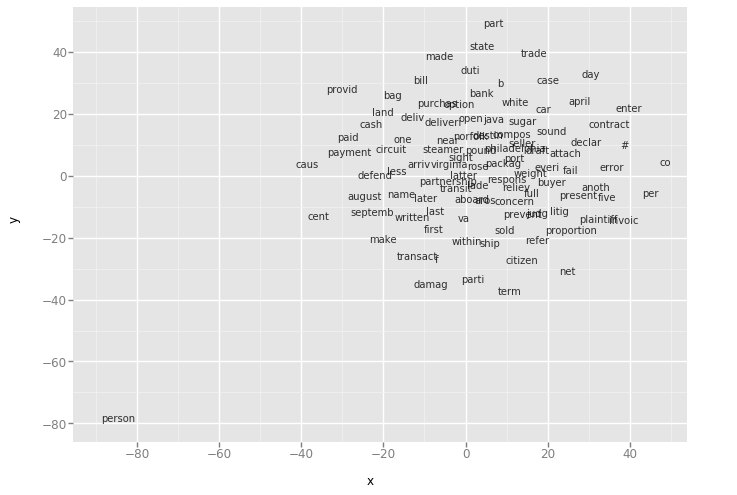

In [82]:
word_vectors = w2v.wv
vocab = list(word_vectors.vocab.keys())[0:100]

word_vectors[vocab]
wv_tsne=tsne.fit_transform(word_vectors[vocab])
df=pd.DataFrame({'word':vocab})

df['x'] = wv_tsne[:,0]
df['y'] = wv_tsne[:,1]
chart = gg.ggplot( df, gg.aes(x='x', y='y', label='word') ) \
                      + gg.geom_text(size=10, alpha=.8, label='word') 
chart.show()

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.001723
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.357662
[t-SNE] KL divergence after 300 iterations: 0.799987


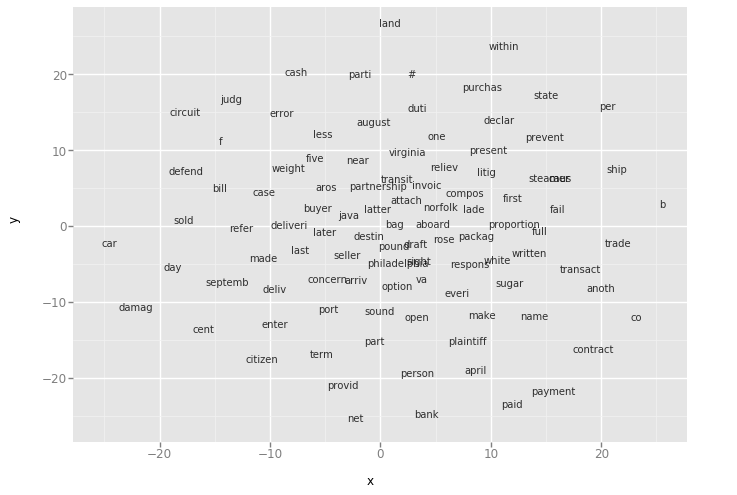

In [84]:
word_vectors1 = w2v1.wv
wv_tsne1=tsne.fit_transform(word_vectors1[vocab])
df1=pd.DataFrame({'word':vocab})

df1['x'] = wv_tsne1[:,0]
df1['y'] = wv_tsne1[:,1]
chart1 = gg.ggplot( df1, gg.aes(x='x', y='y', label='word') ) \
                      + gg.geom_text(size=10, alpha=.8, label='word') 
chart1.show()

Large window size is expected to make the cluster more scattered and small window wize is expected to make the cluster more concentrated because the correlation between words are supposed to be higher. 

In [176]:
## Question2
case_meta = pd.read_csv('case_metadata.csv')

In [12]:
repub=list(np.where(case_meta.loc[0:999,'x_republican']==1))
repub_sentence=[sentence[i] for i in repub[0]]

In [13]:
democ = list(np.where(case_meta.loc[0:999,'x_republican']==0))
democ_sentence = [sentence[i] for i in democ[0]]

In [14]:
repub_sent_norm=[]
for i in repub_sentence:
    for s in i:
        repub_sent_norm.append(normalize_sent(s))
        

In [15]:
democ_sent_norm=[]
for j in democ_sentence:
    for s in j:
       democ_sent_norm.append(normalize_sent(s))

In [17]:
w2v_repub = Word2Vec(repub_sent_norm,  # list of tokenized sentences
               workers = 5, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  20, # Minimum word count  
               window = 5, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

In [25]:
word_vectors_repub = w2v_repub.wv
vocab = list(word_vectors_repub.vocab.keys())[0:100]

In [101]:
word_vectors_repub.most_similar('sentenc',topn=50)

[('last', 0.9217952489852905),
 ('seventh', 0.8952035903930664),
 ('next', 0.8765507340431213),
 ('mention', 0.8614009618759155),
 ('later', 0.8517634272575378),
 ('supplement', 0.8505336046218872),
 ('waiver', 0.8461833000183105),
 ('imprison', 0.8388822078704834),
 ('memorandum', 0.8303502202033997),
 ('fourth', 0.8283989429473877),
 ('second', 0.8279513120651245),
 ('provabl', 0.8252906799316406),
 ('disclaim', 0.8245809674263),
 ('first', 0.8231073021888733),
 ('reject', 0.8183330297470093),
 ('begun', 0.8162934184074402),
 ('vacat', 0.8161987066268921),
 ('refere', 0.8146793842315674),
 ('mandat', 0.8141874074935913),
 ('modifi', 0.8131639361381531),
 ('sinc', 0.8131085634231567),
 ('rehear', 0.8097561597824097),
 ('modif', 0.8073813319206238),
 ('jardin', 0.8031224012374878),
 ('preliminari', 0.7927053570747375),
 ('late', 0.7917251586914062),
 ('77b', 0.7888619899749756),
 ('conform', 0.7874774932861328),
 ('fifth', 0.7866250276565552),
 ('liber', 0.7860604524612427),
 ('thereaf

In [105]:
word_vectors_repub.most_similar('penalti',topn=50)

[('fine', 0.8939406871795654),
 ('specifi', 0.8771588206291199),
 ('deplet', 0.870578408241272),
 ('forfeitur', 0.8661441802978516),
 ('exempt', 0.8646502494812012),
 ('fix', 0.8532615900039673),
 ('declar', 0.8530886173248291),
 ('compens', 0.8504397869110107),
 ('percentag', 0.8465389013290405),
 ('definit', 0.8408477902412415),
 ('prescrib', 0.8405442237854004),
 ('shall', 0.8394503593444824),
 ('addit', 0.8348753452301025),
 ('gross', 0.829845666885376),
 ('henc', 0.8288171291351318),
 ('taxat', 0.8262051343917847),
 ('obsolesc', 0.8246442079544067),
 ('statutori', 0.8238473534584045),
 ('allow', 0.823764443397522),
 ('punish', 0.823015570640564),
 ('comput', 0.8201418519020081),
 ('partial', 0.8192756772041321),
 ('subsequ', 0.8122669458389282),
 ('ascertain', 0.8118658065795898),
 ('manner', 0.8110995888710022),
 ('accrual', 0.8082165122032166),
 ('maximum', 0.8060202598571777),
 ('ad', 0.805481493473053),
 ('deduct', 0.8046569228172302),
 ('futur', 0.8018813133239746),
 ('salari

In [18]:
w2v_democ = Word2Vec(democ_sent_norm,  # list of tokenized sentences
               workers = 5, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  20, # Minimum word count  
               window = 5, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

In [33]:
word_vectors_democ = w2v_democ.wv
vocab = list(word_vectors_democ.vocab.keys())[0:100]

In [100]:
word_vectors_democ.most_similar('sentenc',topn=50)

[('second', 0.8977206945419312),
 ('rehear', 0.8356364965438843),
 ('supplement', 0.8222924470901489),
 ('fourth', 0.8175703287124634),
 ('later', 0.8111966848373413),
 ('modifi', 0.8064736127853394),
 ('count', 0.8043032884597778),
 ('imprison', 0.8027937412261963),
 ('mention', 0.7852163314819336),
 ('earlier', 0.7850087285041809),
 ('last', 0.7761536836624146),
 ('seventh', 0.7737420797348022),
 ('forth', 0.7728669047355652),
 ('refere', 0.768959105014801),
 ('refer', 0.7684704661369324),
 ('fifth', 0.7672855854034424),
 ('vacat', 0.7668046951293945),
 ('confirm', 0.7647534012794495),
 ('concili', 0.7601364254951477),
 ('jackson', 0.7500774264335632),
 ('sec', 0.7455980777740479),
 ('first', 0.7449519634246826),
 ('convict', 0.7448089122772217),
 ('sixth', 0.7432171702384949),
 ('adjudg', 0.7420238256454468),
 ('indict', 0.7412238717079163),
 ('follow', 0.7401059865951538),
 ('tenth', 0.7368546724319458),
 ('paragraph', 0.7367596626281738),
 ('approv', 0.7334228754043579),
 ('77b', 

In [106]:
word_vectors_democ.most_similar('penalti',topn=50)

[('levi', 0.9286715984344482),
 ('transfere', 0.9091895818710327),
 ('assess', 0.9008095264434814),
 ('charit', 0.9003893733024597),
 ('previous', 0.8909958600997925),
 ('exempt', 0.8823947906494141),
 ('comput', 0.8753589987754822),
 ('adjust', 0.8723936676979065),
 ('impos', 0.8665540218353271),
 ('fiduciari', 0.8618509769439697),
 ('fee', 0.854033887386322),
 ('recoveri', 0.8539559841156006),
 ('begun', 0.8524925708770752),
 ('distraint', 0.849794864654541),
 ('provabl', 0.8493868708610535),
 ('collect', 0.8468658924102783),
 ('therefrom', 0.8444584608078003),
 ('imposit', 0.8425424098968506),
 ('pension', 0.835779070854187),
 ('respect', 0.8354817032814026),
 ('disallow', 0.8354090452194214),
 ('overpay', 0.8335490226745605),
 ('gross', 0.8326294422149658),
 ('thereon', 0.8303730487823486),
 ('refund', 0.825014591217041),
 ('waiver', 0.8247809410095215),
 ('calcul', 0.8219233751296997),
 ('liabil', 0.8213714361190796),
 ('depreci', 0.8202552795410156),
 ('redempt', 0.81770062446594

The adjectives that are mostly associated with 'penalty' for republican judge is 'definite','partial','subsequent'; the adjectives that are mostly associated with 'penalty' for democratic judge is 'fudiciary', 'charitable' and 'provable'. The adjectives that are mostly associated with 'sentence' for republican judge is 'provable','liberal' and 'mandatory'; the adjectives that mostly associated with 'sentence' is 'earlier', 'adjudgable' and 'subsequent'.

The differnce of adjectives in these two group is not large. Republican judge could be harsher with respective to its attitude towards sentence and penalty.

In [21]:
## Question 3 
## Look at the effect of text features on citations or reversal (Fong and Grimmer 2016)

In [41]:
filename = glob('cases/*txt')
filename1 = filename[:1000]
docs = []
for fname in filename1:
    #Id = fname.split("_")[-1][:-4] # get docId from filename
    text = open(fname,encoding="utf8").read()
    docs.append(text)

In [51]:
from nltk.tokenize import RegexpTokenizer

texts=[]
tokenizer = RegexpTokenizer(r'\w+')
for i in docs:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stoplist]
    #print(stopped_tokens)
    # stem tokens
    stemmed_tokens = [stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)


In [54]:
## Step 1: Split training set and test set
train = np.random.choice( len(texts),500,replace=False)
test = [i for i in range(1000) if i not in train]

In [112]:
## Step 2:  Use LDA on the n-gram frequencies to generate text feature. 
## In the paper, Indian Buffet Process is used. 
##As There is not a well written package on IBP, here I choose to use LDA to illustrate the idea

In [71]:
## Train the LDA model: choose # of topics to be 10
from gensim import corpora, models
import gensim
train_text = [texts[i] for i in train]
dictionary = corpora.Dictionary(train_text)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in train_text]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)

In [72]:
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.011*"patent" + 0.011*"court" + 0.011*"defend" + 0.010*"v" + 0.009*"c"'), (1, '0.012*"v" + 0.012*"state" + 0.010*"tax" + 0.009*"case" + 0.008*"l"'), (2, '0.015*"trust" + 0.011*"incom" + 0.010*"tax" + 0.010*"bank" + 0.009*"v"'), (3, '0.014*"land" + 0.013*"state" + 0.009*"commiss" + 0.009*"act" + 0.009*"v"'), (4, '0.019*"court" + 0.013*"act" + 0.010*"state" + 0.009*"v" + 0.008*"u"'), (5, '0.013*"tax" + 0.012*"year" + 0.010*"act" + 0.009*"valu" + 0.008*"assess"'), (6, '0.021*"insur" + 0.014*"polici" + 0.010*"contract" + 0.005*"upon" + 0.005*"compani"'), (7, '0.020*"court" + 0.016*"v" + 0.015*"compani" + 0.012*"c" + 0.010*"case"'), (8, '0.024*"state" + 0.018*"unit" + 0.013*"v" + 0.009*"l" + 0.009*"u"'), (9, '0.011*"leas" + 0.009*"claim" + 0.008*"court" + 0.008*"v" + 0.008*"oil"')]


In [115]:
## Obtain text corpus
test_text = [texts[i] for i in test]
corpus_test = [dictionary.doc2bow(text) for text in test_text]
#ldamodel[corpus_test[1]]

[(0, 0.04841064),
 (1, 0.10623721),
 (3, 0.12613556),
 (4, 0.2380958),
 (5, 0.06401038),
 (6, 0.062264413),
 (8, 0.34711042)]

In [116]:
## Obtain the mixture of topics for each document
topics = []
topics_prob = []
for i in corpus_test:
    topic = []
    topic_prob = []
    for j in ldamodel[i]:
        topic.append(j[0])
        topic_prob.append(j[1])
    topics.append(topic)
    topics_prob.append(topic_prob)

In [174]:
df0 = pd.DataFrame()
for j in range(0,500):
    #print(j)
    feature ={}
    for i in range(0,10):
        #print(i)
        #print(topics[j])
        if i not in topics[j]:
            feature[i] = 0
        else:
            index = topics[j].index(i)
            feature[i] = topics_prob[j][index]
    df0 = pd.concat([df0,pd.DataFrame([feature])],ignore_index=True)         

In [194]:
## Step 3: Apply the features to the test set and perfrom regression by setting the dependent variable to be log_cites
from sklearn.linear_model import LinearRegression
log_cites = np.nan_to_num(case_meta['log_cites'])
linear_regressor = LinearRegression(fit_intercept=False)
linear_regressor.fit(df0,log_cites[test])
linear_regressor.coef_

array([0.95892009, 1.54707764, 1.42296607, 2.00350683, 1.60288282,
       1.07450131, 1.40739413, 1.52210336, 1.42982529, 0.11330435])

The results indicate that topic 3 (cases with respective to laws in land and state) has the largest impact on citation. Topic 9 (cases with respective to laws in oil lease) has the lowest impact on citation. 